# Example 1

In [ ]:
import micropip
await micropip.install('../../packages/sympy-1.14.dev0-py3-none-any.whl')
#takes a while


In [ ]:
%pip install git+https://github.com/BorekSaheli/sympy.git@structure2d

Consider a two-dimensional structure, consisting of three connected members. The first member is $4$ meters long and horizontal. The second member is connected to the end of the first member and is $5$ meters long, forming an angle of arctangent $\left(\cfrac{3}{4}\right)$ relative to the $x$-axis. The third member is also $5$ meters long and forms an angle of arctangent $\left(\cfrac{4}{3}\right)$ relative to the $x$-axis. There is a fixed support at the end of the third member. The sign convention used in this example is, forces acting downward and to the right are considered positive. Angles for loads are measured relative to the positive $x$-axis in the anticlockwise direction, and angles for members are measured relative to the positive $x$-axis in the clockwise direction.

The material properties are defined as follows:
- Elasticity Modulus $\left(E\right)$: $30000 \text{ kN/m}^2$
- Second Moment of Area $\left(I\right)$: $1 \text{ m}^4$
- Cross-sectional Area $\left(A\right)$: $10000 \text{ m}^2$

The structure has two-point loads:
- $F_h$: A horizontal load of $15 \text{ kN}$ applied at the start of the first member, acting to the right (positive $x$).
- $F_v$: A vertical load of $16 \text{ kN}$ applied at the midpoint of the first member, acting downward. (negative $y$)

Additionally, there are two distributed loads, noted as $q_v$:
- The first distributed load is $6 \text{ kN/m}$, applied along the entire length of the first member, acting downward (negative $y$).
- The second distributed load is $6 \text{ kN/m}$, applied over the first half of the second member, also acting downward (negative $y$).

Let’s solve the example using the structure2d module. First, we import the Structure2d module from the SymPy library with ` sympy.physics.continuum_mechanics.structure2d` . We then define the material properties: the elasticity modulus (`E`), the second moment of area (`I`), and the cross-sectional area (`A`). Next, we create an instance of the Structure2d class, assigning it to the variable `s`. This instance sets up the code to run method functions on the Structure2d object.

Note that the line `%config InlineBackend.figure_format = 'svg'` is used in Jupyter notebooks to configure the output format of plots for better image quality and `init_printing` is used for proper math output.

In [13]:
import matplotlib.pyplot as plt
from sympy.physics.continuum_mechanics.structure2d import Structure2d
from sympy import init_printing
init_printing()
%config InlineBackend.figure_format = 'svg'

E = 3e4
I = 1
A = 1e4
s = Structure2d()


Once the structure object is initialized, we need to input the example problem into the Structure2D object. This input consists of two main steps: adding members and adding loads. Both steps involve defining $x$ and $y$ coordinates on a two-dimensional grid, where the structure can be drawn. Additionally, the user can generate a plot of the structure at any step, allowing for easy visualization throughout the process. Values for loads can be either SymPy symbols or numerical values.

Let's build the structure from the example. Start by selecting an arbitrary reference point on the grid in this case, the reference point is chosen to be $\left(0, 0\right)$. The first member is horizontal and $4$ meters long, starting at the reference point and extending from left to right. Therefore, the coordinates for the start and end of this member are $\left(0, 0\right)$ and $\left(4, 0\right)$, respectively.

For the two remaining members, the coordinates are less straightforward. Since Structure2D currently doesn't support adding members using angles and lengths directly, we must first convert these into sets of coordinates based on the geometry of the structure. This design choice was made to save time, there is a possibility to make a new function that can add members based on their angle and length. Suppose the second member is angled and extends from $\left(4, 0\right)$ to $\left(8, 3\right)$, and the third member extends from $\left(8, 3\right)$ to $\left(11, -1\right)$. These coordinates are determined by calculating the end points based on lengths and angles or from known coordinates in the problem.
Once the coordinates are determined, we assign the material properties defined earlier to all members.

In [14]:
s.add_member(x1=0, y1=0, x2=4 , y2=0 , E=E, I=I, A=A)
s.add_member(x1=4, y1=0, x2=8 , y2=3 , E=E, I=I, A=A)
s.add_member(x1=8, y1=3, x2=11, y2=-1, E=E, I=I, A=A)

At any point during the process of solving, it is possible to use the draw method to obtain a plot that shows the current state of the structure. This not only helps to visualize the result but also assists during the setup process by verifying the correct placement of members. The draw method offers several parameters that allow you to customize the visualization:
- `forced_load_size` : A numerical value that forces all loads to be drawn with the specified magnitude, based on the grid units. This can help standardize the appearance of loads for better visual comparison, when load values are very high.
- `show_load_values`: A Boolean value (`True` or `False`) that toggles whether the numerical values of the loads are displayed on the plot. Setting it to True will annotate the loads with their magnitudes.
- `draw_support_icons`: A Boolean value (`True` or `False`) that determines whether icons representing the types of supports (fixed, pinned, roller) are drawn at the support locations.

Let's use the draw method with these parameters to visualize the current state of the structure.

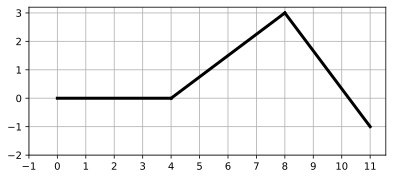

In [15]:
s.draw()

Now that the structure is set up, we can add loads to it. The Structure2D object provides two methods to apply loads: `apply_load()` for external loads and `apply_support()` for support reactions. In the example, there are four external loads: two-point loads and two distributed loads.
The `apply_load()` method takes several parameters:
- `start_x` and `start_y`: the coordinates where the load starts.
- `value`: the magnitude of the load.
- `global_angle`: the angle at which the load acts, measured in degrees from the positive $x$-axis.
- `order`: the order of the load, based on the mathematical theory of singularity functions $-1$ for point loads and $0$ for constant distributed loads.
- `end_x` and `end_y` (optional): the coordinates where the load ends (required for distributed loads).

Let's input the first two-point loads, $F_h$ and $F_v$. $F_h$ is a point load of $15 \text{ kN}$ acting at $\left(0, 0\right)$ along the positive $x$-axis ($0 \text{ degrees}$). $F_v$ is a point load of $16 \text{ kN}$ acting at $\left(2, 0\right)$ downward ($270 \text{ degrees}$)



In [16]:
s.apply_load(start_x=0, start_y=0, value=15, global_angle=0 , order=-1)
s.apply_load(start_x=2, start_y=0, value=16, global_angle=270, order=-1)

For the distributed loads, we need to specify the start and end coordinates. For example, a distributed load of 6 kN/m acting downward between $\left(0, 0\right)$ and $\left(4, 0\right)$ is applied and another distributed load from $\left(4, 0\right)$ to $\left(6, 1.5\right)$ is applied.

In [17]:
s.apply_load( start_x=0, start_y=0, value=6, global_angle=270, order=0, end_x=4, end_y=0, )
s.apply_load( start_x=4, start_y=0, value=6, global_angle=270, order=0, end_x=6, end_y=1.5, )

Next, we add the support reactions using the `apply_support()` method. This method takes the following parameters:
- `x` and `y`: the coordinates of the support.
- `type`: the type of support ('fixed', 'pin', 'roller').

In the example, we have a fixed support at $\left(11, -1\right)$. The `apply_support()` method returns the symbolic reaction forces, these need to be assigned to variables (we will use these in the next step). As our example has a fixed support, $3$ reaction loads are returned.

In [18]:
Rv, Rh, T = s.apply_support(x=11, y=-1, type="fixed")

In this code, `Rv` and `Rh` represent the vertical and horizontal reaction forces, and `T` represents the moment reaction at the fixed support. By using the $apply_support()$ method, we have added support reactions to our structure.
Let’s use the draw method to visualize what we just added, this time we can set the `show_load_values` input to `True` to view the load values.

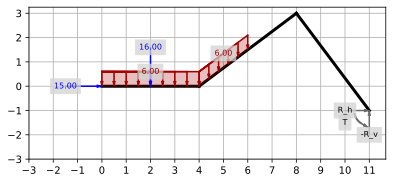

In [19]:
s.draw(show_load_values=True)

We are done with the setup and have input all the information from the example into the structure2d class and are ready to solve.

To solve the structure, we use the `solve_for_reaction_loads()` method of the Structure2d object. This method calculates the reaction forces at the supports and determines the shear force and bending moment equations along the structure. The method takes the following parameter:
- `reaction_force_variables`: Variables representing all reaction loads acting on the structure.

In our example, we have reaction forces `Rv`, `Rh`, and `T` at the fixed support located at $\left(11, -1\right)$. We pass these variables to the `solve_for_reaction_loads()` method to solve the structure.

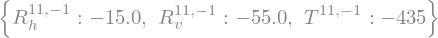

In [20]:
s.solve_for_reaction_loads(Rv, Rh, T)

After running this code, the structure is in a solved state and the method will return the reaction loads. This means that the reaction loads at the supports have been determined, and the shear force and bending moment equations for each member have been calculated.

With the structure solved, we can generate outputs to analyze the results. The Structure2D object provides several methods to display the results, including plotting the structure with loads and supports, printing a summary of the reaction forces and internal forces, and plotting the shear force and bending moment diagrams.
First, we can print a summary of the solved reaction loads and internal forces using the summary method. This method takes an optional parameter `round_digits` to specify the number of decimal places for rounding, if set to `None`, it will display exact analytical values. Currently the exact analytical values in some cases are not always computed for the reaction loads resulting in numerical values, this is a known bug.
In this summary:
- Reaction Loads: Displays the calculated reaction forces at the supports. The coordinates of the support are given in square brackets, and the unwrapped coordinate along the structure is given in parentheses.
- Points of Interest - Bending Moment: Lists the bending moment values at specific points along the structure.
- Points of Interest - Shear Force: Lists the shear force values at specific points along the structure.
- The location computation for the coordinates on the structure is not yet implemented for bending moments and shear forces, only the unwrapped coordinates are shown. The square brackets currently have place holders.

In [21]:
s.summary(round_digits=None)

===================== Structure Summary =====================

Reaction Loads:
R_v   [11.00,-1.00]  (14.00)             = -55.0000000000000
T     [11.00,-1.00]  (14.00)             = -435
R_h   [11.00,-1.00]  (14.00)             = -15.0000000000000

Points of Interest - Bending Moment:
bending_moment at [x.xx,y.yy]  (0.00)    = 0
bending_moment at [x.xx,y.yy]  (4.00)    = -80
bending_moment at [x.xx,y.yy]  (9.00)    = -330
bending_moment at [x.xx,y.yy]  (14.00)-  = -434.999979000000

Points of Interest - Shear Force:
shear_force at [x.xx,y.yy]  (0.00+)      = 0
shear_force at [x.xx,y.yy]  (2.00-)      = -11.9999940000000
shear_force at [x.xx,y.yy]  (2.00+)      = -28
shear_force at [x.xx,y.yy]  (4.00-)      = -39.9999940000000
shear_force at [x.xx,y.yy]  (4.00+)      = -41
shear_force at [x.xx,y.yy]  (9.00-)      = -53.0000000000000
shear_force at [x.xx,y.yy]  (9.00+)      = -21
shear_force at [x.xx,y.yy]  (14.00-)     = -21.0000000000000


Next, we can redraw the structure, now numerical values of the reaction loads are displayed.

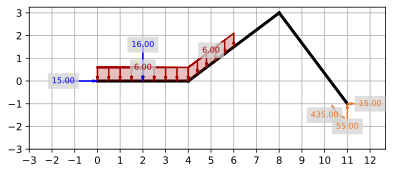

In [22]:
s.draw(show_load_values=True)

We can also plot the shear force and bending moment diagrams using the `plot_shear_force()` and `plot_bending_moment()` methods. These methods generate plots of the shear force and bending moment along the length of the unwrapped structure. Note that due to current limitations, these diagrams are plotted along the unwrapped coordinate of the structure and are not overlaid onto the original two-dimensional geometry, this could be done another possible future enhancement for the module.

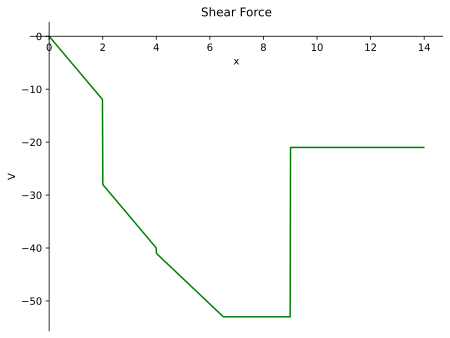

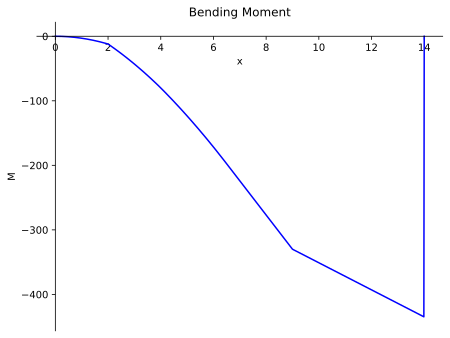

In [23]:
s.plot_shear_force()
s.plot_bending_moment()

Additionally, we can evaluate the shear force and bending moment at any point along the structure using the `shear_force()` and `bending_moment()` methods. These methods accept either an $x$ coordinate or both $x$ and $y$ coordinates.

In [24]:
print(s.shear_force(2,0))
print(s.bending_moment(2,0))

-28
-12


In this example, we evaluate the shear force and bending moment at the point $\left(2, 0\right)$ on the structure. Due to current limitations, when using both $x$ and $y$ coordinates, the methods do not support evaluating values just before or just after a point where discontinuities may occur (e.g., at points of applied loads). This is important because shear forces can exhibit sudden jumps at these locations. As a workaround, if only the $x$ coordinate is provided, the evaluation is performed along the unwrapped coordinate of the structure. This allows us to evaluate the values just before or just after a discontinuity by using a very small value $dx$.

In [25]:
dx = 1e-6
print(s.shear_force(2 - dx))
print(s.shear_force(2 + dx))

-11.9999940000000
-28.0000060000000
